<a href="https://colab.research.google.com/github/nafiul-araf/Lab-work/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Loding the Data***

In [ ]:
import numpy as np
import pandas as pd
from my_custom_utils import data_preparation,important_features_visualization_linear,feature_selection_linear

In [ ]:
df=pd.read_csv('Copy of Depression and Happiness Factor Analysis.csv')
#df.head()

In [ ]:
df.shape

(920, 21)

### ***Data Preparation***

In [ ]:
df_final=data_preparation(df)
df_final.shape

(920, 18)

### ***Feature Selection***

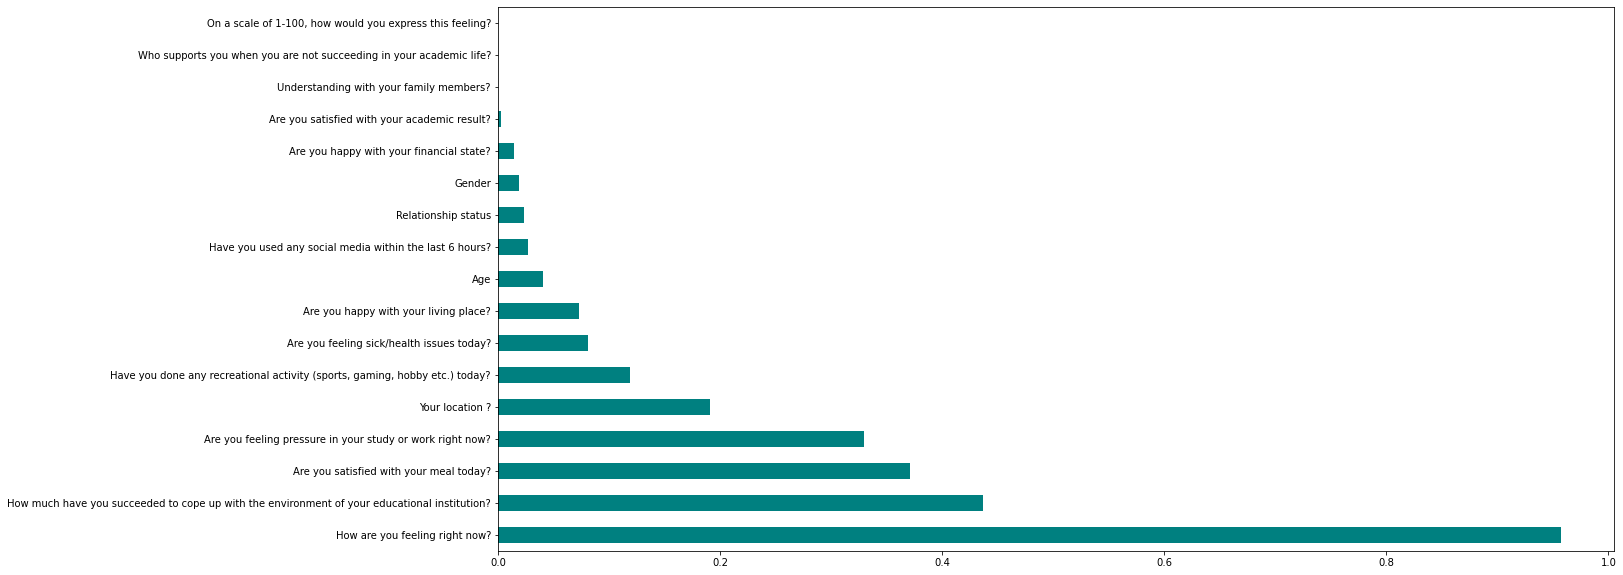

In [ ]:
imp_feat_vis=important_features_visualization_linear(df_final)
imp_feat_vis

In [ ]:
important_features=feature_selection_linear(df_final)
important_features

Index(['How are you feeling right now?', 'Your location ?',
       'Are you feeling pressure in your study or work right now?',
       'Are you satisfied with your meal today?',
       'How long did you sleep last night?(in hours)'],
      dtype='object')

### ***Building the Linear Regression Model***

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold,RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
#df_final.head()

In [ ]:
X_new=df_final[['Your location ?','Are you feeling pressure in your study or work right now?','Are you satisfied with your meal today?','How are you feeling right now?','How long did you sleep last night?(in hours)']]
y_new=df_final[['On a scale of 1-100, how would you express this feeling?']]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.2,random_state=10)

In [ ]:
cv=RepeatedKFold(n_splits=5,n_repeats=5,random_state=10)

In [ ]:
lin=LinearRegression(normalize=True)

In [ ]:
mse_cv=-cross_val_score(lin,X_train,y_train,cv=cv,scoring='neg_mean_squared_error',n_jobs=-1)

In [ ]:
mse_cv

array([522.43731345, 457.52222543, 388.85437922, 326.75781291,
       311.09496209, 343.13422454, 375.68732165, 443.16758113,
       462.86677795, 382.57364983, 416.06585569, 447.84691159,
       393.48286908, 394.618334  , 364.16988878, 454.0348777 ,
       457.78785526, 367.61107966, 349.17657968, 363.15422949,
       413.22680773, 378.5202676 , 382.28350548, 358.38213314,
       496.87974572])

In [ ]:
lin.fit(X_train,y_train)

LinearRegression(normalize=True)

In [ ]:
y_pred_train=lin.predict(X_train)

In [ ]:
mse_train=mean_squared_error(y_train,y_pred_train)
mse_train

390.3201463656541

In [ ]:
y_pred_test=lin.predict(X_test)

In [ ]:
mse_test=mean_squared_error(y_test,y_pred_test)
mse_test

411.26376014444025

In [ ]:
mse_cv.mean()

402.0534875522881

In [ ]:
lin.score(X_test,y_test)

0.6382133717040077

In [ ]:
lin.score(X_train,y_train)

0.679479734692318

In [ ]:
import matplotlib.pyplot as plt

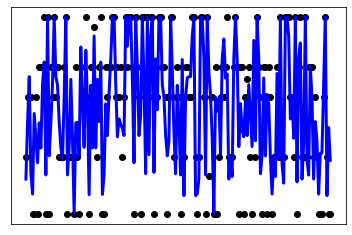

In [ ]:
plt.scatter(range(len(X_test)),y_test,color='black')
plt.plot(range(len(X_test)),y_pred_test,color='blue',linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### ***Summary***

Very worst performance